<a href="https://colab.research.google.com/github/MachineLearnia/Python-Machine-Learning/blob/master/24%20-%20Sklearn%20%3A%20Apprentissage%20Non-supervis%C3%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 24/30 Apprentissage Non-Supervisé

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import metrics
import pandas as pd

ModuleNotFoundError: No module named 'sklearn'

## 1. K-Means Clustering

In [2]:
from sklearn.cluster import KMeans

ModuleNotFoundError: No module named 'sklearn'

In [4]:
raw_data = pd.read_csv("features.csv", sep=",")
selected_data = raw_data.drop("respondent_id", axis=1)
X = selected_data.values
selected_data.head()

,0,1,2,3,4,5,6,7,8,9
0,6.091980,4.083743,-0.708842,-1.319933,1.958292,0.749813,-0.338337,-1.075547,0.747246,-0.813171
1,6.173349,3.960209,-0.416016,-1.247812,2.117210,0.701720,-0.432131,-1.203010,0.816890,-0.584521
2,6.274913,3.771598,-0.219680,-1.138934,2.290283,0.569223,-0.518831,-1.366173,0.832631,-0.338123
3,6.255466,3.823234,-0.138528,-1.176732,2.286241,0.625457,-0.522714,-1.338063,0.861370,-0.344693
4,6.164563,3.973503,-0.388645,-1.280136,2.134362,0.688947,-0.429035,-1.198556,0.782858,-0.560365


# Modélisation

## Kmeans

In [5]:
# création du modèle
model_kmeans = KMeans(n_clusters=8)
model_kmeans.fit(X)

C:\Users\Cleme\PycharmProjects\machineLeaningCC\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans()

In [6]:
# Evaluation
print(model_kmeans.score(X))
model_kmeans.inertia_

-82806.86681351736


82806.86681351736

In [7]:
clustering_labels_km = model_kmeans.fit_predict(X)

C:\Users\Cleme\PycharmProjects\machineLeaningCC\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
clustering_labels_km

array([7, 7, 7, ..., 0, 0, 0])

In [9]:
X1 = X.copy()
X1 = pd.DataFrame(X1)


clustering_labels_km

X1['labels'] = clustering_labels_km

In [10]:
metrics.silhouette_score(X1, X1['labels'])

0.33179781830783445

In [11]:
#Création des clusters/classes sur la base train
clusters_kmeans = model_kmeans.predict(X)

clusters_kmeans


array([7, 7, 7, ..., 0, 0, 0])

In [12]:
import pandas as pd

clusters_kmeans1 = pd.DataFrame({'clusters':clusters_kmeans})
clusters_kmeans1['clusters'].value_counts()



6    1196
0     982
1     899
4     763
3     722
5     540
7     536
2     456
Name: clusters, dtype: int64

In [13]:
clusters_kmeans1

,clusters
0,7
1,7
2,7
3,7
4,7
...,...
6089,0
6090,0
6091,0
6092,0


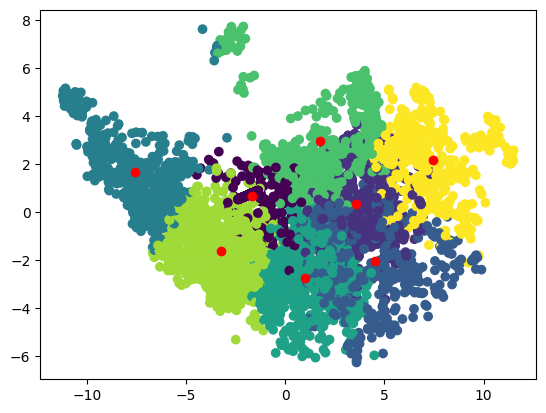

In [14]:
# Visualisation des clusters
plt.scatter(X[:,0], X[:,1], c = clusters_kmeans)
plt.scatter(model_kmeans.cluster_centers_[:,0], model_kmeans.cluster_centers_[:,1], c='r')

In [15]:
# connaitre le nombre de variables explicatives
model_kmeans.n_features_in_

10

In [16]:
# connaitre le nombre de cluster
model_kmeans.n_clusters

8

In [17]:
# connaitre les centres
model_kmeans.cluster_centers_

array([[-1.65847005e+00,  6.86720844e-01,  3.73520196e-02,
        -9.43975267e-01, -3.91748778e-01,  1.17693871e+00,
        -4.67607376e-02, -1.03482308e+00, -4.81264299e-02,
         3.10785541e-01],
       [ 3.58378302e+00,  3.33331158e-01, -2.36404740e+00,
         1.13690634e-01,  1.65292490e-02, -3.61525131e-02,
        -3.67593401e-01, -3.99363088e-02, -7.49840609e-02,
         9.74913759e-02],
       [ 4.50194219e+00, -2.02597568e+00,  1.90273605e+00,
         9.21286248e-01,  9.60845604e-01,  8.79992909e-01,
        -1.87521395e-01,  5.72067301e-02,  1.80998592e-01,
        -1.41161078e-02],
       [-7.59044438e+00,  1.67635432e+00,  1.49436484e-01,
         3.24906246e-01,  5.09670650e-01, -3.79478361e-01,
         2.71009413e-03,  3.46681819e-01,  2.85689489e-01,
         8.67998535e-02],
       [ 9.82341729e-01, -2.75153893e+00,  1.33174223e-01,
         3.29724733e-01, -9.59404647e-01, -5.35594396e-01,
        -5.80103889e-02,  5.66613326e-03,  2.93060508e-01,
        -8.

### Elbow Method

In [18]:
# Recherche du k optimal par la méthode du coude
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

C:\Users\Cleme\PycharmProjects\machineLeaningCC\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Cleme\PycharmProjects\machineLeaningCC\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Cleme\PycharmProjects\machineLeaningCC\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Cleme\PycharmProjects\machineLeaningCC\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_in

Text(0, 0.5, 'Inertia')

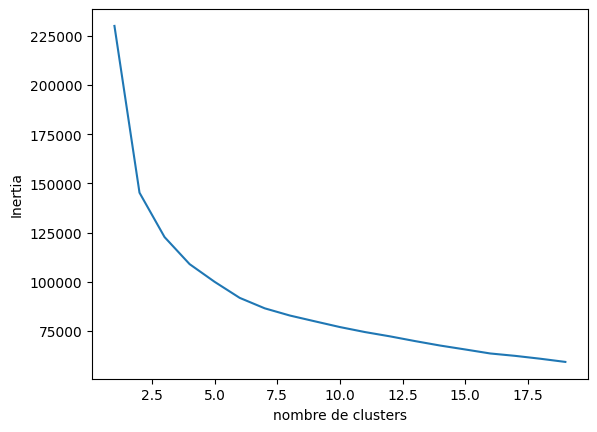

In [19]:
# Visualisation du coude
plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Inertia')

## 2. Detection d'anomalies avec Isolation Forest

In [20]:
from sklearn.ensemble import IsolationForest

In [21]:
# Création du modèle d'isolation Forest

model_isofo = IsolationForest(contamination=0.01)

anomalies = model_isofo.fit(X)

In [22]:
# Clusters des anomalies
clusters_ano = anomalies.predict(X)

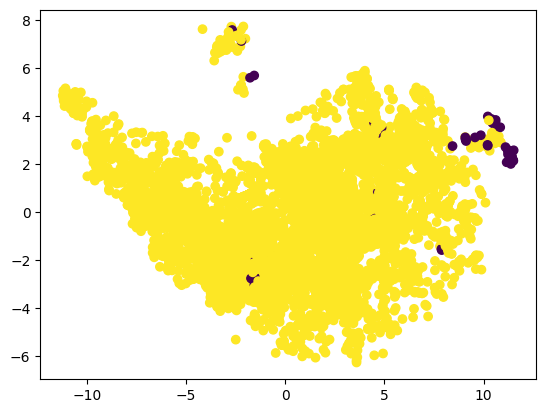

In [23]:
# Visualisation des clusters des anomalies
plt.scatter(X[:,0], X[:, 1], c=clusters_ano)

## 3. DBSCAN

In [24]:
from sklearn.cluster import DBSCAN

In [25]:
db_model = DBSCAN(eps=0.5, min_samples=4)


# modelisation

clustering = db_model.fit(X)

clustering_labels = db_model.fit_predict(X)

In [26]:
X1 = X.copy()
X1 = pd.DataFrame(X1)


clustering_labels

X1['labels'] = clustering_labels
X1.head()

,0,1,2,3,4,5,6,7,8,9,labels
0,6.091980,4.083743,-0.708842,-1.319933,1.958292,0.749813,-0.338337,-1.075547,0.747246,-0.813171,0
1,6.173349,3.960209,-0.416016,-1.247812,2.117210,0.701720,-0.432131,-1.203010,0.816890,-0.584521,0
2,6.274913,3.771598,-0.219680,-1.138934,2.290283,0.569223,-0.518831,-1.366173,0.832631,-0.338123,0
3,6.255466,3.823234,-0.138528,-1.176732,2.286241,0.625457,-0.522714,-1.338063,0.861370,-0.344693,0
4,6.164563,3.973503,-0.388645,-1.280136,2.134362,0.688947,-0.429035,-1.198556,0.782858,-0.560365,0


In [27]:

metrics.silhouette_score(X1, X1['labels'])

0.04112218360089228

In [36]:
X.shape

(6094, 10)

In [40]:
len(X[:])

6094

ValueError: x and y must be the same size

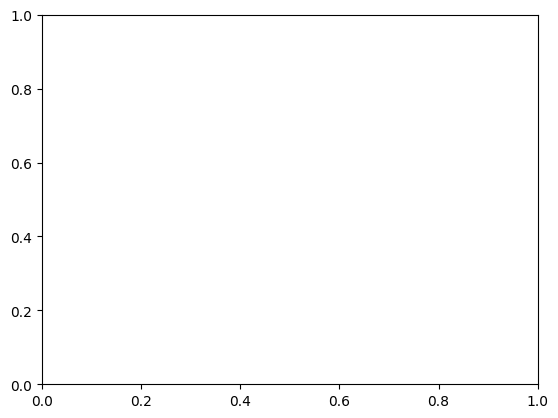

In [42]:
plt.scatter(X[:], range(0, 6093), c=clustering.labels_ )

In [29]:
# catégorisation
clusters_db = pd.DataFrame({'clusters':clustering.labels_})
clusters_db['clusters'].value_counts()

-1      4703
 106     812
 5        20
 104      17
 79       13
        ... 
 34        4
 71        4
 23        4
 74        4
 70        4
Name: clusters, Length: 108, dtype: int64